<a href="https://colab.research.google.com/github/GopiMindgloer/Machine_Learning/blob/master/Iris_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the  libraries needed
import seaborn as sbn
from sklearn import model_selection
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url,names = names)

In [0]:
print(dataset.shape)
dataset["class"].value_counts()

(150, 5)


Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [0]:
print(len(dataset))

150


In [0]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [0]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [0]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


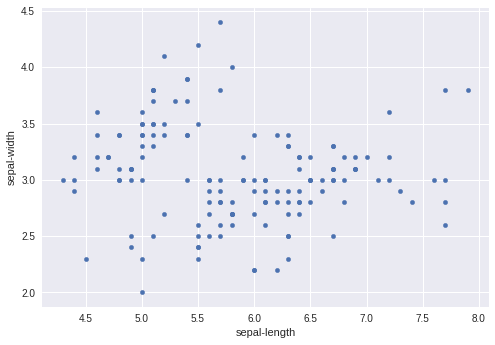

In [0]:
dataset.plot(kind = "scatter", x = "sepal-length", y = "sepal-width")
plt.show()

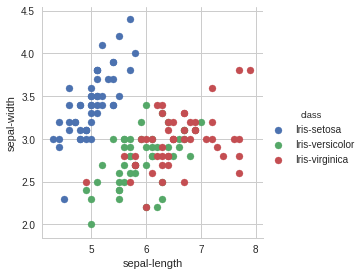

In [0]:
sbn.set_style("whitegrid")
sbn.FacetGrid(dataset,hue = "class",size = 4).map(plt.scatter,"sepal-length","sepal-width").add_legend()
plt.show()

The above one is a 2d scatter plot. We can also plot 3d scatter plots. but we cannot visualize 4d or 5d scatter plots. So we use pairplots.

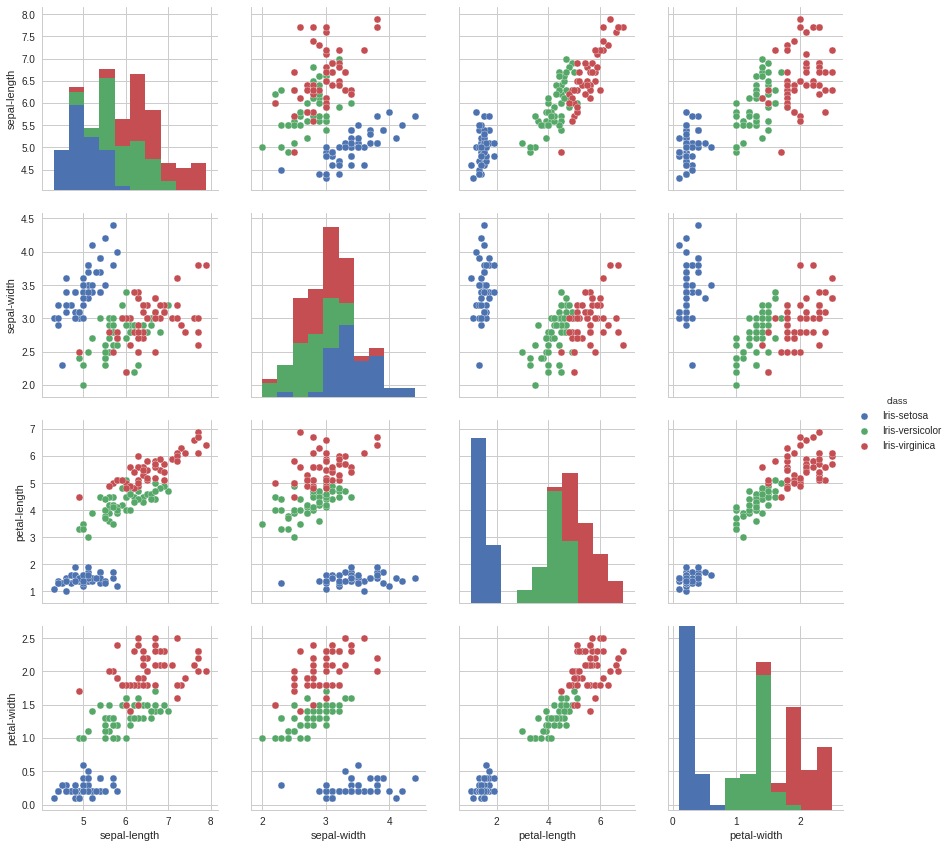

In [0]:
sbn.pairplot(dataset,hue = "class",size = 3)
plt.show()

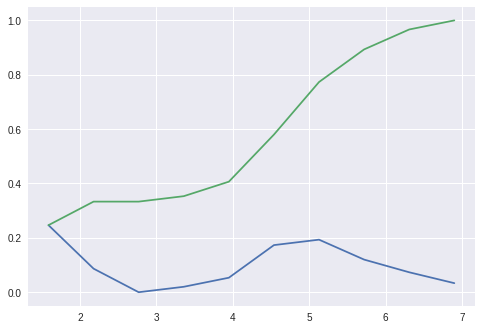

In [0]:
counts, bin_edges = np.histogram(dataset["petal-length"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

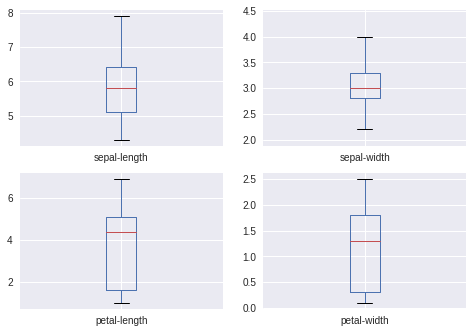

In [0]:
#univariate_plots
dataset.plot(kind = "box", subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

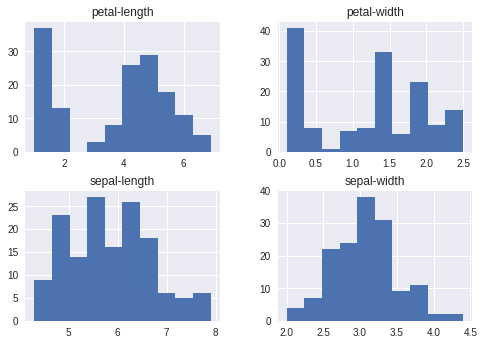

In [0]:
dataset.hist()
plt.show()

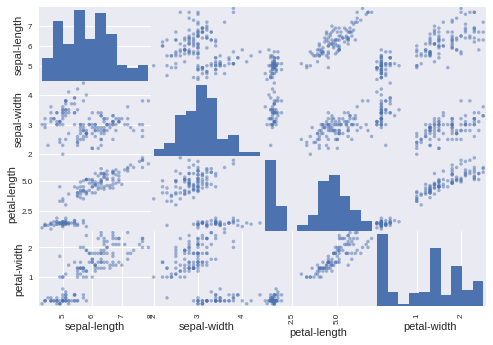

In [0]:
#multivariate_plots
scatter_matrix(dataset)
plt.show()

In [0]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model
results = []
names = []
for name,model in models:
  kfold = model_selection.KFold(n_splits=10, random_state = seed)
  cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv = kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)